In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [70]:
data = pd.read_excel('E:/360_codes and materials/others doc/University_Clustering.xlsx (1)/University_Clustering.xlsx')
data.head()
data.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [26]:
data= data.drop(['Univ','State'],axis =1)
data.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

NORMALIZATION (SCALE) FUNCTION IS USED

In [28]:
data=scale(data)


In [46]:
pca =PCA(n_components=6)
pca_values = pca.fit_transform(data)
pca_values

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

In [57]:
#the amount of variance that each pca expalains is 
var = pca.explained_variance_ratio_
#var = pca.explained_variance_ratio_.cumsum()
#if we use this we will get cumulative sum of the values
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [53]:
pca.components_
pca.components_[0]

array([-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
       -0.37940403])

In [59]:
var1 =np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

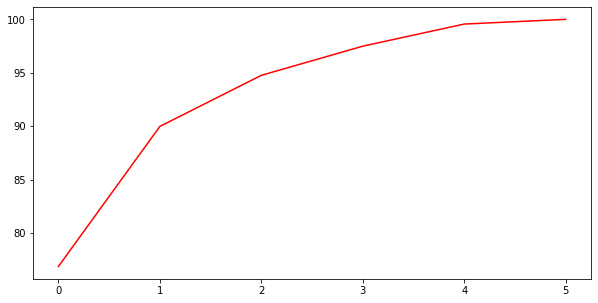

In [63]:
plt.figure(figsize = (10,5));plt.plot(var1,color = 'red')

In [75]:
pca_values
values=pd.DataFrame(pca_values)
values.columns ='pca0','pca1','pca2','pca3','pca4','pca5'
final = pd.concat([data.Univ,values],axis=1)
final.head()

,Univ,pca0,pca1,pca2,pca3,pca4,pca5
0,Brown,-1.009874,-1.064310,0.081066,0.056951,-0.128754,-0.034650
1,CalTech,-2.822238,2.259045,0.836829,0.143845,-0.125962,-0.180703
2,CMU,1.112466,1.631209,-0.266787,1.075075,-0.191814,0.345679
3,Columbia,-0.741741,-0.042187,0.060501,-0.157208,-0.577611,0.109163
4,Cornell,-0.311912,-0.635244,0.010241,0.171364,0.012726,-0.016921


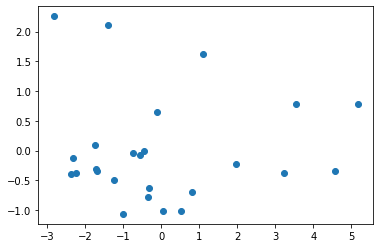

In [76]:
plt.scatter(x = final.pca0, y = final.pca1)